# Floods and Housing Prices:
## _Evaluations at the Zip Code-level for the 48 Contiguous States_
_*Calvin Whealton*_
*calvin.whealton@mg.thedataincubator.com*

In [18]:
from IPython.display import Image

## Business Objective

Natural hazards (floods, earthquakes, tornadoes, etc.) are an inescapable part of life. Many of these hazards have the most impact when thee is an extreme event. For instance, this project focuses on flooding. Most communities in the United States do not develop where the homes and other buildings would be flooded every year; however, they might be flooded every few decades. 

One problem with studying the impacts of extreme events is that the dataset is naturally smaller. An event that nominally happens with only 1% chance each year will mean that the vast majority of data is discarded as irrelevant. Leveraging data for better decison making requires using what data there is available. One set of visualizations focuses on the descriptive representation of sevearl diverse datasets.

Specifically, the impact of the 100-year flood is estimated by predicting the housing market response for the year following the 100-year flood. A 100-year floood has a nominal exceedance frequency of 1% per year (https://www.usgs.gov/special-topic/water-science-school/science/100-year-flood?qt-science_center_objects=0#qt-science_center_objects). Although somewhat arbitrary, the 100-year floodplain is commonly used in regulations related to flood insurance and many parts of riverine flood control (e.g. levees) could be designed around the 100-year flood.

The result of this project is a report and a machine learning algorithm that can be used in determining the likely response of the housing market in a community (zip code) to a 100-year flood event. Specifically, the time series of percentage month-over-month change in housing prices is predicted. More general statistics on the trends in the floods and past history of flood claims is also reported. This data is useful for people interested in investing in a community. This could be prospective home buyers, real estate investors, or other people interested in identifying areas based on their potential response to floods.


## Software Packages

Most of the analysis was performed using Jupyter Notebooks. The following software packages were used in the computations. There are probably dependencies for these libraries that are not included here.

**geopandas**: handling of spatial data, particularly gage and zip code locations and projecting to different coordinate reference systems (https://geopandas.org).

**matplotlib**: plotting of results including scatterplots, line plots, bar plots, etc. (https://matplotlib.org).

**moviepy**: creating videos from a collection of figures (https://zulko.github.io/moviepy/).

**numpy**: numerical calculations on large matrices including euclidian distance (https://numpy.org).

**os**: changing directories for file input/output, listing files in directories (https://docs.python.org/3/library/os.html).

**pandas**: general data wrangling, input/output for csv and similar files (https://pandas.pydata.org). 

**PIL**: concatenating figures in to a single larger figure (https://www.pythonware.com/products/pil/)

**scikit-learn**: creating machine learning models including transformers and estimators (https://scikit-learn.org/stable/).

**scipy**: statistical distributions and calculations (https://www.scipy.org).

**statsmodels**: auto-regressive model used for comparison in prediction (https://www.statsmodels.org/stable/index.html).

QGIS was also used to create a file that would clip the shapefiles for all the United States to cover only the contiguous 48 states.

## File Structure

The repository is laid out in the following manner.

* data 
    - gage_data (peak flow data in a subfolder, summary data used for scraping)
    - geodata (shapefiles including tigerline, rivers and streams, US geography)
    - processed_data (output after cleaning data)
* images_report (various images used in this notebook)
* notebooks
    - cleaning (notebooks used to clean the input datasets)
    - visualizations (making figures for zip codes and other purposes)
* pickled_models (fitted ML KNN models)
* visualizations
    - pretty (nice looking ones)
    - videos (videos from data)
    - zip_results (figures for each zip code, broken down by folders)

## Data Ingestion

Several sources of data are used. The following is a brief summary of the data, how it was obtained, and some of the ways it was processed and used in the project.

Generally, the time period of interest is between 1996 and 2019 (inclusive). This is mainly a result of the housing data. Data outside of this time period can be included, particularly for the stream gages.

Many of the shapefiles or otherwise georeferenced data is projected in a decimal latitude and longitude (e.g. WGS84) system. This is not useful for quick Euclidian distance calculations, so the values were reprojected in to the U.S. National Atlas Equal Area projection (EPSG: 2163).

### Zillow Housing Value Index

Zillow Housing Value Index (ZHVI) is a dataset available from Zillow. It includes the monthly ZHVI values for zip codes. More information on this metric is available at https://www.zillow.com/research/zhvi-methodology-2019-highlights-26221/. It is designed to represent the typical value of a home in the zip code (or any other geography available). The file was downloaded directly from the website (https://www.zillow.com/research/data/).

As part of the pre-processing, the monthly ZHVI was converted in to a month-over-month percentage change. 

### United States Geological Survey Stream Gages

Peak flow data series are available from the United States Geological Survey (USGS). There are approximately 29,000 of such gages maintained by the USGS (https://nwis.waterdata.usgs.gov/usa/nwis/peak). As a simple pre-screening measure, only gages with at least 20 years of record were considered as viable because return periods on the order of 100 years was required. The gages numbers and locations were downloaded and saved as a local file, which was then used in scraping. Of the resulting gages, typical gages had about 40-50 years of record.

The pre-screened list of gages was used with a pseudo-API to download the peak flow data for each gage. An example of the tab separated file for gage 01667500 is available at https://nwis.waterdata.usgs.gov/nwis/peak?site_no=01667500&agency_cd=USGS&format=rdb. Based on the gage number, agency, and type of file it was possible to construct a scraping method that would download all the data.

The peak flow data was processed to generate return periods assuming a log normal distribution. The resulting return periods were reported in the descriptive statistics and used for filtering time periods to determine floods. Additionally, the sequence of floods was used to evaluate stationarity in the floods for each gage.

### National Flood Insurance Program Claims

National Flood Insurance Program (NFIP) redacted claims dataset was downloaded from https://www.fema.gov/media-library/assets/documents/180374. The contents are a large file that includes claims from 1970 through at least 2019. It includes many variables including the date of loss, presumably the date of the flood, zip code associated with the claim, amount paid on building and contents, and whether the building is residential among others.

The use of this dataset was descriptive. It was processed to aggregate the residential claims by month, year, and zip code. This resulting series is reported.

### Zip Code Tabulation Area Tigerline Shapefile

The United States Census maintains several shapefiles representing different features. Because the analysis in this project is based on zip codes (postal codes), the Zip Code Tabulation Area (ZCTA) for the 2010 Census was used. Some discussion between the zip code and the ZCTA are provided at https://www.census.gov/programs-surveys/geography/guidance/geo-areas/zctas.html?. Although the mapping between the two is not perfect, the ZCTA is taken as a reasonable approximation to the zip code. No further corrections were made given that there seemed to be no readily available shapefile of zip codes themselves.

The zip code shapefile has some basic information the area, interpolation latitude and longitude, etc., for the zip code. It does not have information on the population or income for the zip code.

### Zip Code Median Income

The 2018 American Community Survey from the U.S. Census provides information on the median household income for county subdivisions. Specifically, table S1901 for each state can be downloaded.

To convert between county subdivision and ZCTA, a relationshp file for the 2010 U.S. Census was used (https://www.census.gov/geographies/reference-files/time-series/geo/relationship-files.html). The median household income was taken as population-weighted median incomes of the different county subdivisions that comprise the ZCTA. For instance, if zip code 12345 had 30% of its population from county subdivision 1 with a median household income of 50 kUSD/yr and 70% of its population from county subdivision 2 with a median income of 30 kUSD/yr, the resulting estimated median income would be 36 USD/yr.

Given the general data range of interest is between 1996 and 2019, the median income might change over that time period. However, it was treated as constant in this analysis.

### Zip Code Population

The same relationship file that was used to map between county subdivision and ZCTA had the population of each ZCTA, which was used as the population for the zip code.

As with median income, the population likely would change over the period of interest; however, it was treated as constant.

### U.S. GDP

U.S. Quarterly GDP percentage change was used as a proxy for the general economic environment. (BEA originial souce, downloaded from https://fred.stlouisfed.org/series/A191RL1Q225SBEA)

### Graphical Summaries of Data

This is the availability of different data series over the time period.

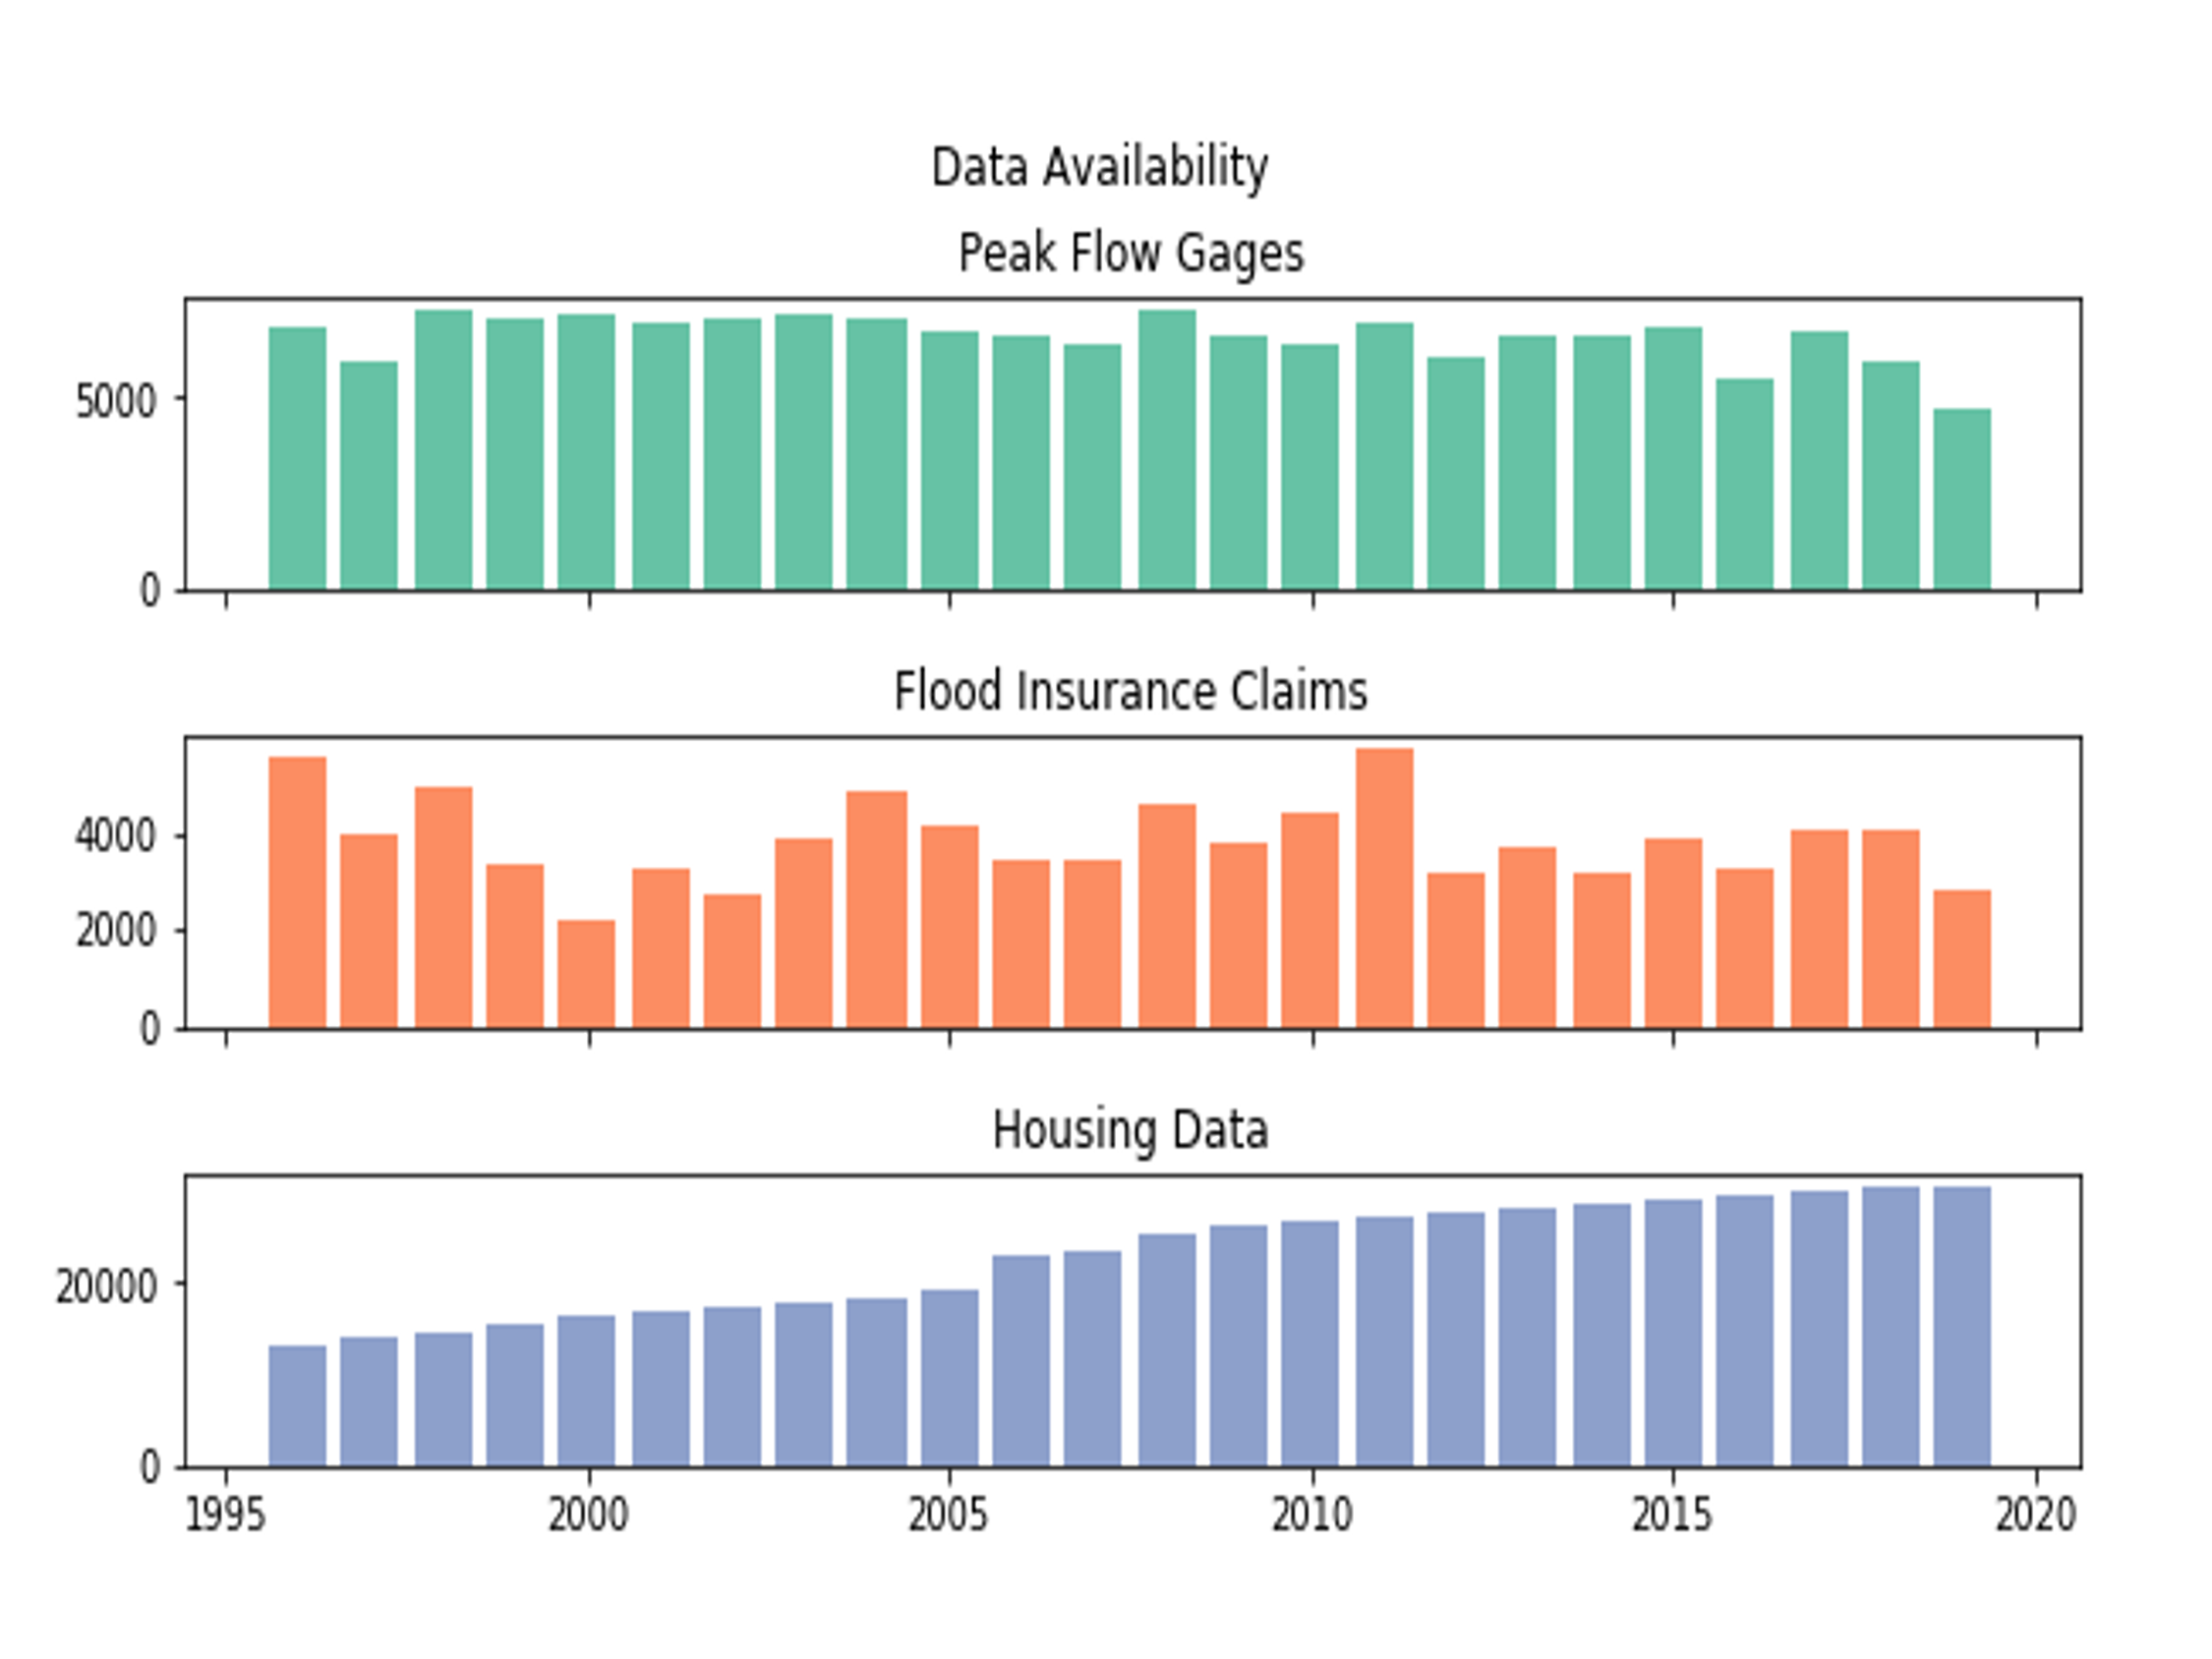

### Non-Stationarity in Flood Series

The following figure shows the trends towards non-stationarity in the flood gages across the US. The redder the point the strong the trend towards increasing floods. Trends were evaluated using a Kendall tau test between the peak flows and the year of the flood.

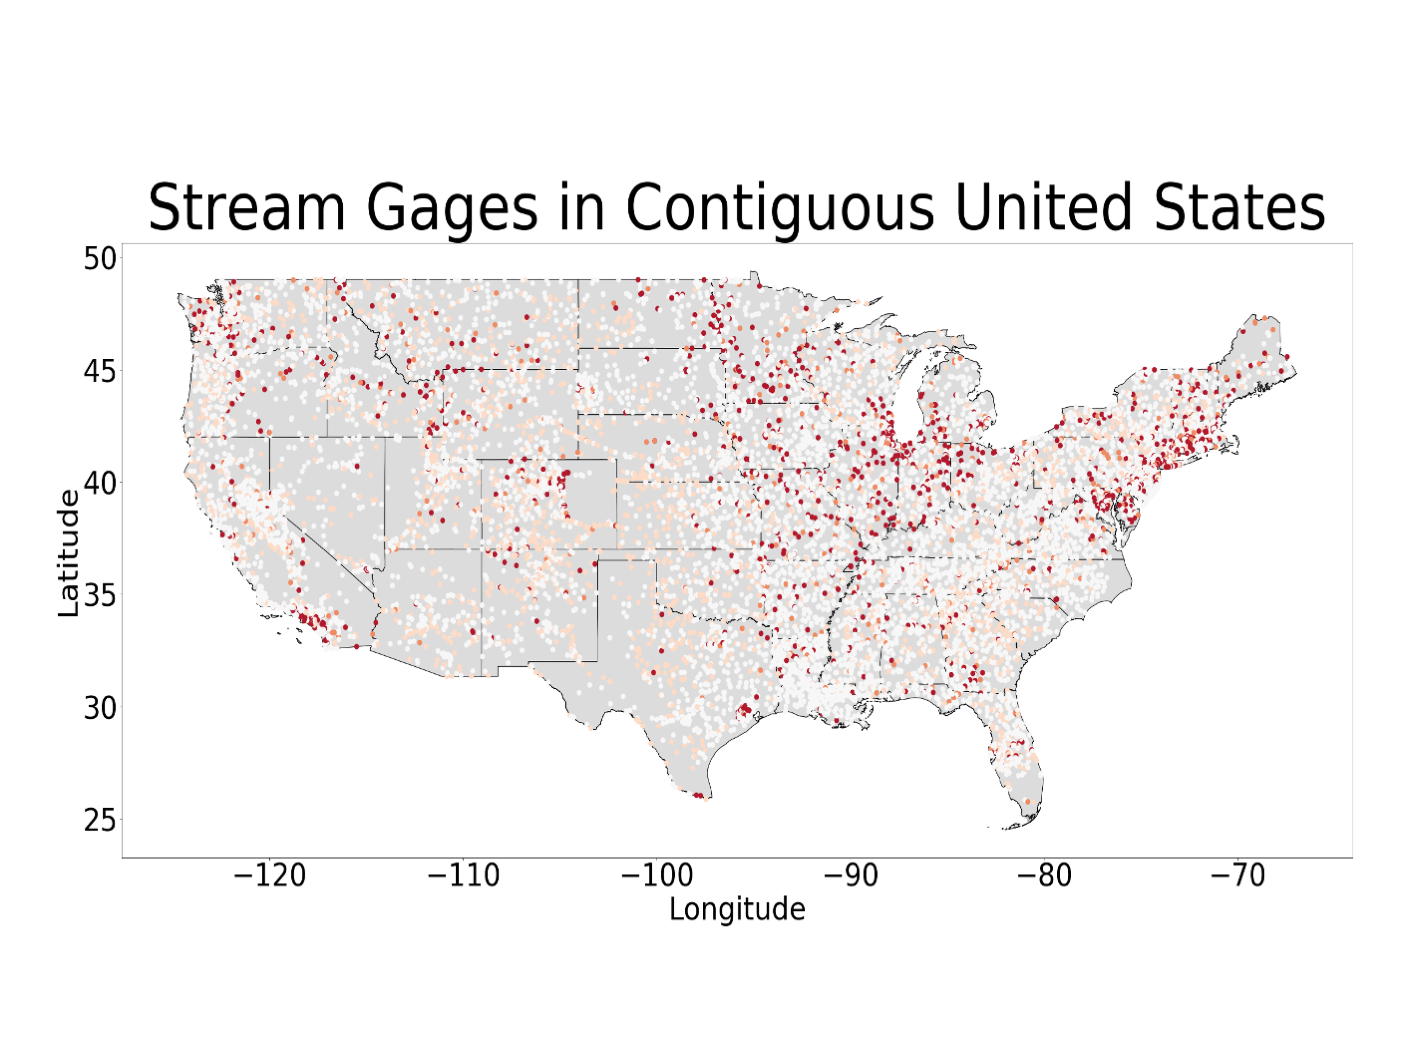

## Machine Learning

The goal of the machine learning part of the project is to predict the response of the housing market (ZHVI) after an extreme flood (100-year). For this purpose, a custom set of transformers and a custom estimator were written. The general outline of the input data processing until the machine learning algorithm is provided below. Two of hte pipelines use the inter quartile range (IQR) instead of min-max or standard deviation scaling because it is considered to be more stable in the presence of possible outliers.

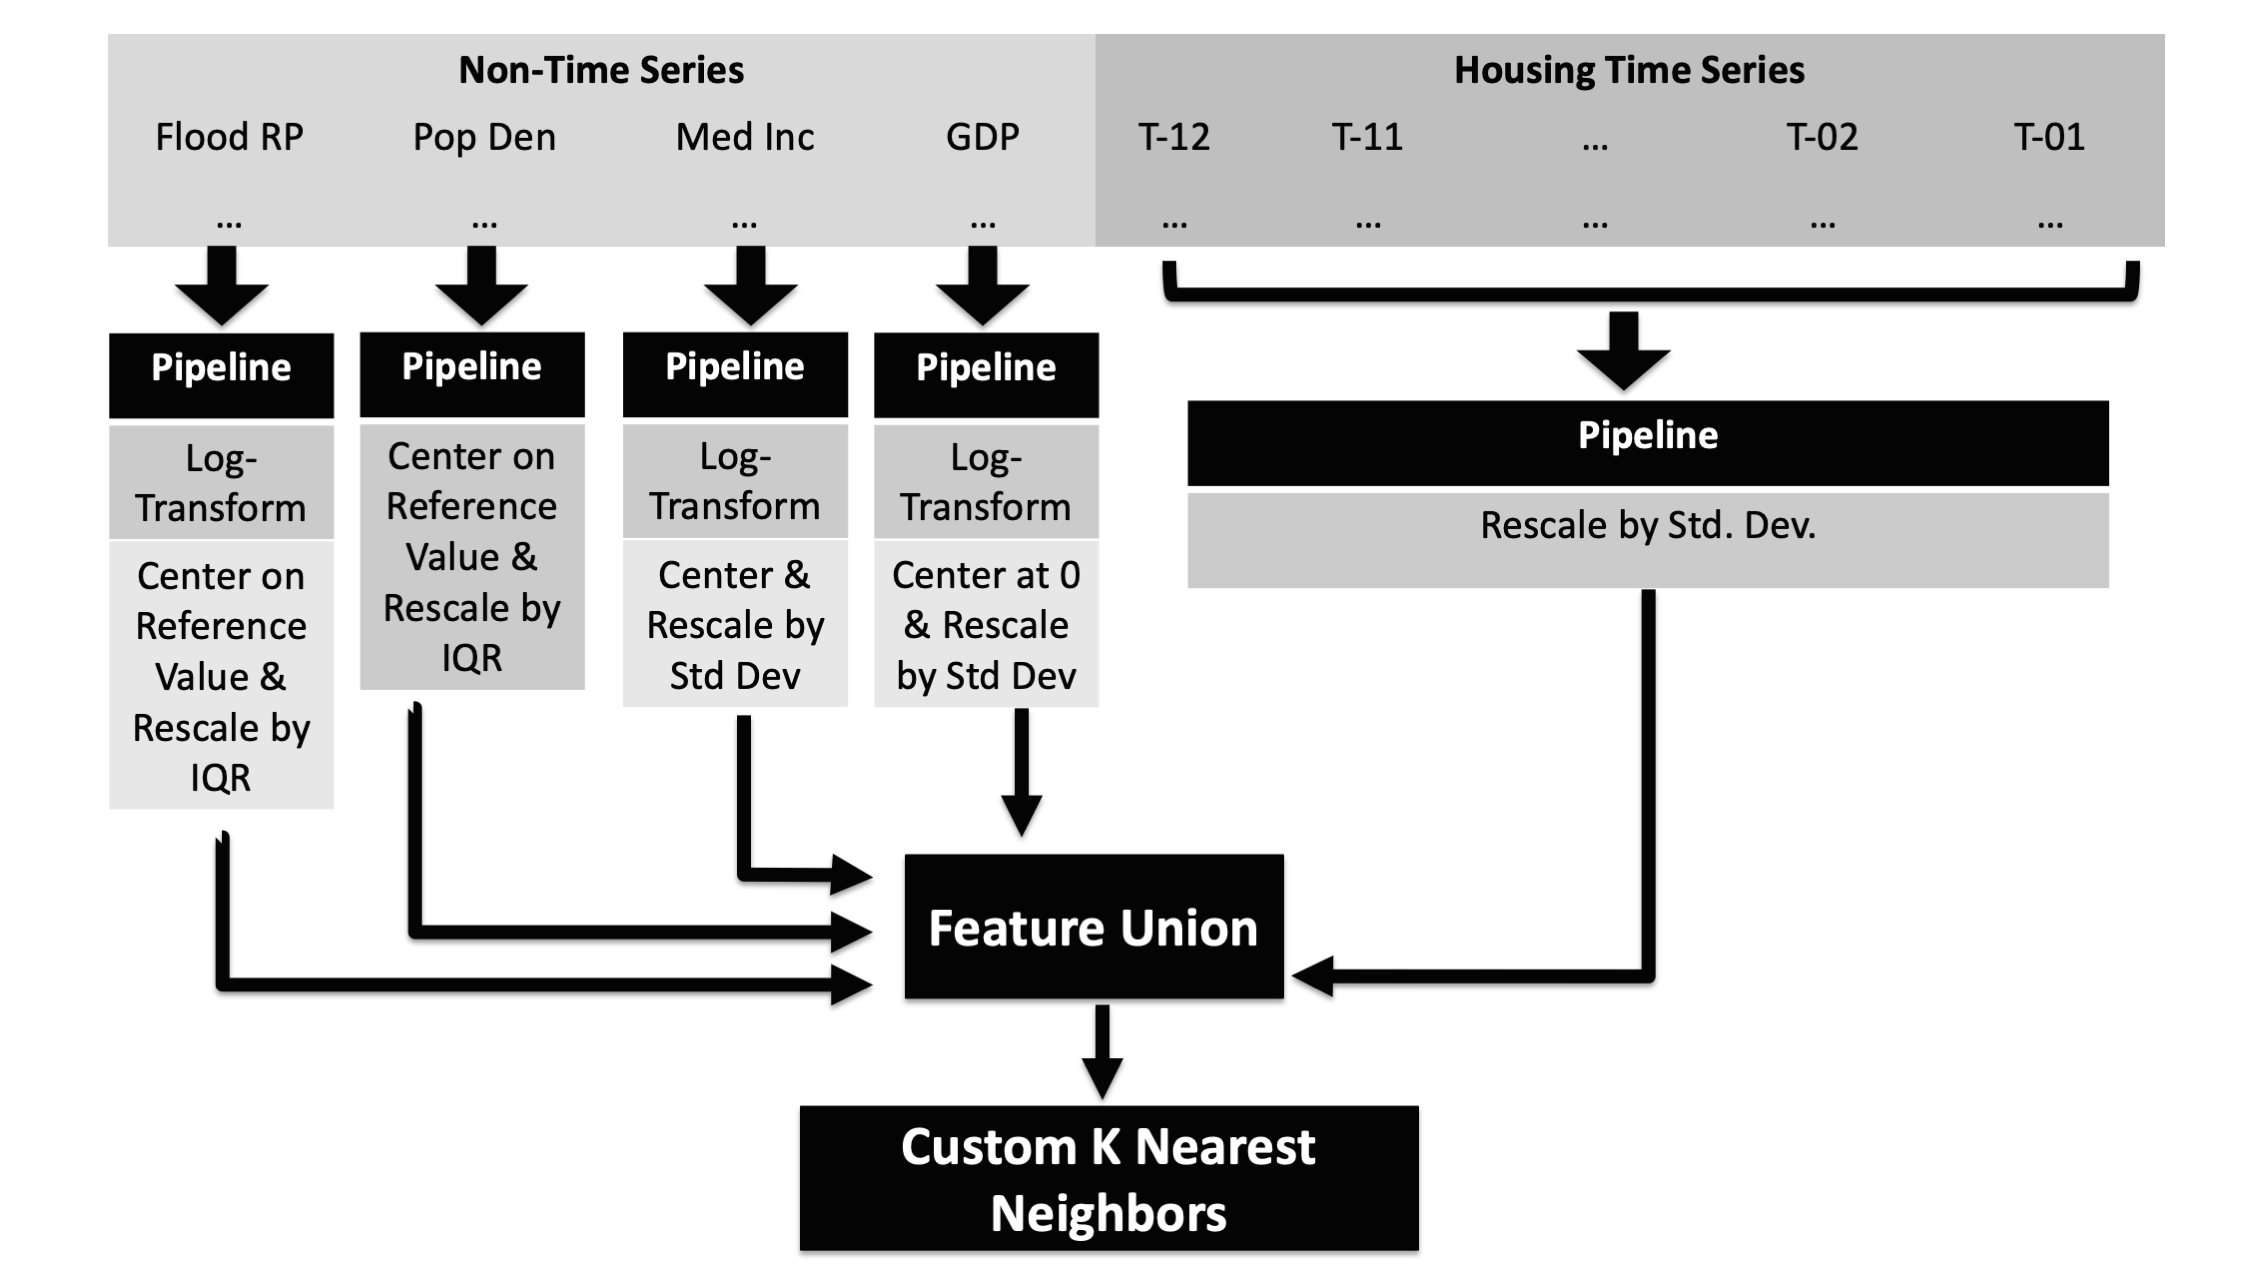

The original X matrix at the top is constructed based on several steps.

0. *Locating gages for zip code*: The gages 10 closest gages for each zip code are identified. This is done in a pre-processing step. The result is a file that includes the zip code, gage number of the 10 closest gages, and distance between the gage and the interpolation latitude and longitude for the zip code.


1. *Finding flood return periods*: A log-normal distribution is fit to each of the gage flood series using log-space method of moments. The lognormal distribution is a two-parameter distribution that assumes the logarithms of the flow are normally distributed. This is not the approach adopted in the Federal guidelines (Bulletin 17C), but is reasonably effective and the log-normal model is a reasonable approximation in many cases. Return periods are calculated from the inverse of the exceedance frequency.


2. *Zip code return period and date*: All of the floods with return periods less than 50 years are screened out. The dates of the floods and flood return periods are stored across all the gages associated with the zip code, and then the geometric mean of the return periods and the mean date of flood in the year are calculated. The mean date and month are taken as the month of the flood. This does use calendar year and not water year.


3. *Housing data*: Based on the year-month of the floods, the housing data for the previous 12 and following 12 months are extracted and stored. It is possible for there to be overlapping floods within this window. For instance, if one flood occured on 2000-10 and another on 2001-5, the two time series would have some overlap. This was not accounted for. However, the probablity of two sequential 50-year flood events would be about 0.0004, so the effect should be minor.


4. *Treatment of missing housing values*: Not all zip codes have the whole time period covered. More zip codes have data for more recent time periods. Also, there seems to be fairly regular missing values in some of the time series that will cause a single not defined percentage change. If there was only one missing value, it was imputed as the average of the neighboring values. If there was more than one missing value, the zip code was dropped.


5. *Joining demographic data*: The population and median income data were calculated, and combined with the zip code area the population density could be calculated. These were joined to the housing data. If the zip code values were not defined for the demographic data, the zip code series were dropped.


Following these processing steps, there were approximately 28,000 series of data that met the requirements (>50-year return period, defined housing data, defined demographic data). These served as the input data for the machine learning pipeline.

A K Nearest Neighbors regressor tries to predict data based on the neighbors. Neighbors are determined based on the distance between the point where a prediction is desired and the known neighbors. In this case, the distance is calculated based on both a time invarant set of features and a time series. In this problem, the distance is not clear. Even if all the values are transformed to similar ranges, the relevant distance in the housing price time series dimension might not be the same as that for the median income, population density, or other variable.

The distance measure used in the custom estimator is described below, where the first N features represent the time-invariant data and the remaining T represent the time series (housing prices) used in similarity. The weights, w, are hyper parameters of the algorithm along with the number of neighbors K.

In [9]:
%%latex
$d(X_i, X_j) = \sum_{n=1}^N w_n*(X_{i,n} - X_{j,n})^2 + w_{N+1}\sum_{t=1}^T (X_{i,N+t}-X_{j,N+t})^2$

<IPython.core.display.Latex object>

Predictions for the follwing time periods is based on averaging the time series post-flood for the dataset of similar values. The k post-flood time series are the K ones with the smallest distance measure defined above.

In [17]:
%%latex
$y_{pred}(t_0 + t) = \frac{1}{K} \sum_{k=1}^K y_k(t_0 + t)$

<IPython.core.display.Latex object>

### ML Hyper Parameter Optimization

As with any algorithm with hyper parameters, it can be difficult to determine what are good values of the parameters. Rules of thumb for K Nearest Neighbors (KNN) are often difficult to determine. Therefore, the hyper parameters were based on a wide range of possible values. There are 5 parameters that need to be optimized because all the other weights can be defined relative to one of the weights.

The measure of efficiency of the algorithm chosed to optimize is the Mean Squared Error. This is evaluated for all the time periods in the prediction and over all series in the test dataset.

In [16]:
%%latex
$MSE = \frac{1}{N_{test}*T} \sum_{t=0}^T \sum_{n=1}^{N_{test}} \left[\hat{y}_{n,pred}(t_0+t)-y_n(t_0+t)\right]^2$

<IPython.core.display.Latex object>

The following plots show the results for 300 combinations of the number of weights and different neighbors that were randomly sampled on a log-scale. The top left is the number of neighbors and the other parameters are the weights. The best parameters seemed to have realtively low number of neighbors (5) high GDP weight (about 50) low income and housing time series weights, and very low median income weight.

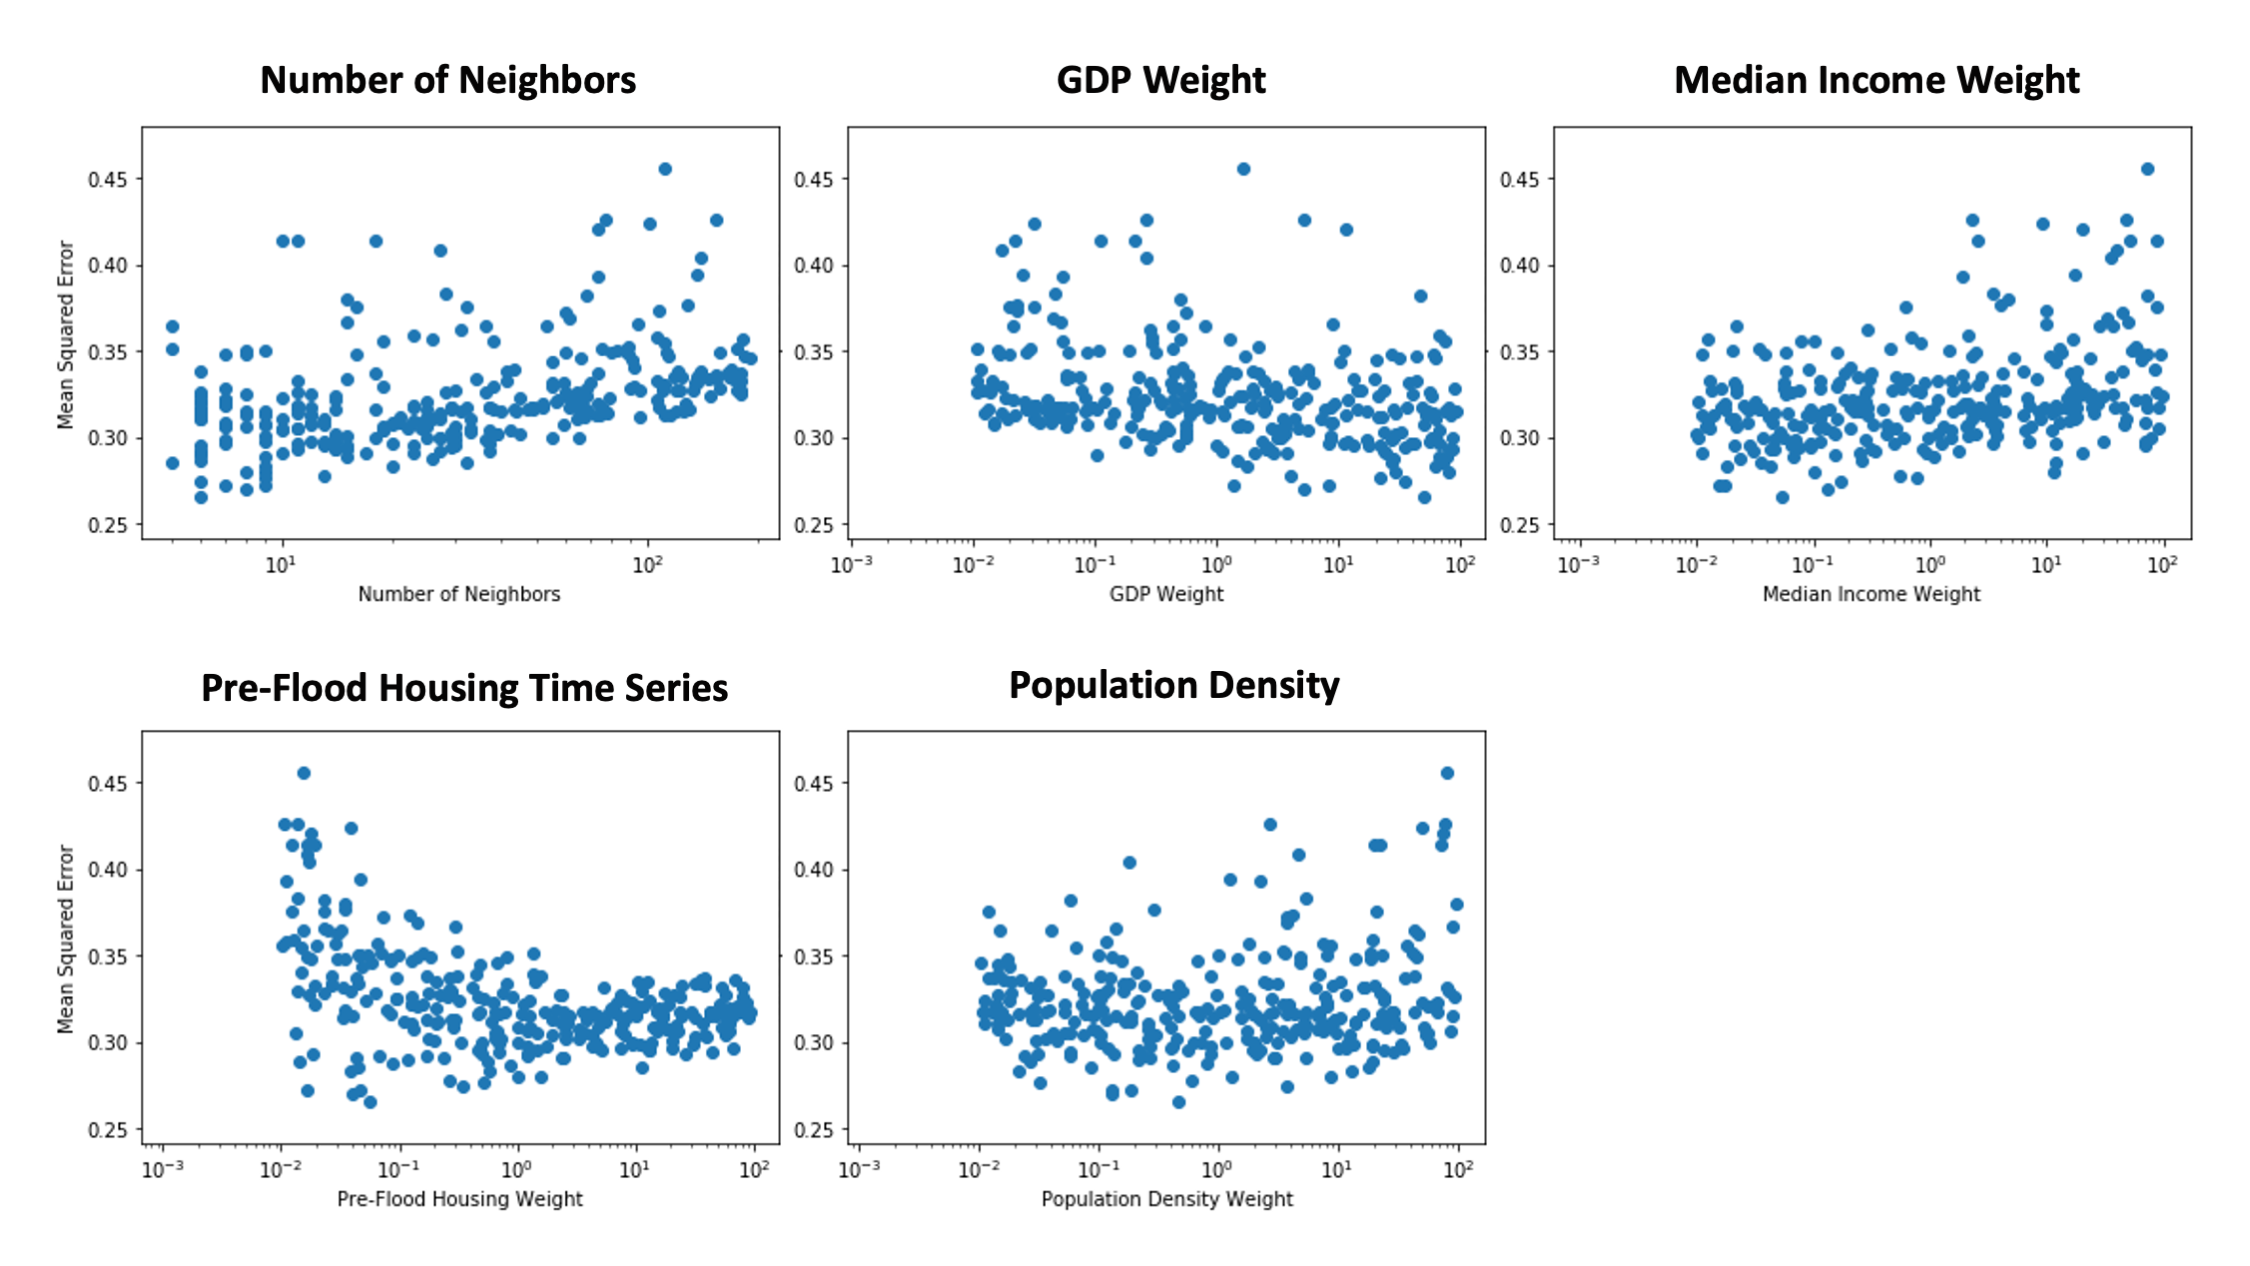

### Benchmarking with Other Models

It is difficult to compare the results from one model without having some baseline of other plausible models. To this end, three alternative models were developed and compared based on the MSE (described above).

_Auto-Regressive_ : This model uses on of the pre-defined auto-regressive models fit to the 12 months of data before the flood. Admittedly, this is a poor model because no regularization was include and the number of fitted parameters was very high. There is anticipated to be a lot of noise in the fit, and hence the results are not anticipated to be great.

_Mean Behavior_ : The mean of the previous 12 months is taken as the prediction for the next 12 months. This does not account for any time trend and essentially assumes that the flood would not have an impact.

_KNN Model without Floods_ : A similar KNN model that that described above is developed, but no flood information is explicitly included. Approximately 180,000 random series are selected to use as the neighbors, and then the hyper parameters of this model are optimized. Following this, it is used to predict response with the flood events. This is essentially testing a trained generalized model and its ability to fit a special circumstance -- prices following floods.

The results of the analysis are shown below. As can be seen, the proposed model has the lowest MSE. This might be somewhat surprising given that the weight on the flood was so low, but it suggests that there is an implicit weight on the flood cases because the model was trained on those cases.

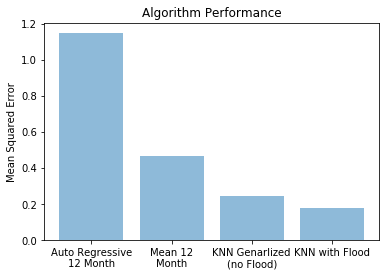

## Reported Results

The reported results for each zip code can be divided in to the descriptive statistics of past evens and the machine learning model predictions with respect to the response of the housing market following an extreme flood (100-year return period) in the future. This section outlines the interpretation of each type of data.

### Trends in Gages

Some flood gages in the United States show trends towards larger or smaller floods over the period of record. Clearly, increasing floods with time could be information that is useful when considering the long-term risk in an area.

The figure below shows an example plot used to illustrate the trends evaluated using the Kendall Tau test (peaks vs time). The orange points show an increasing trend and the blue points show a decreasng trend. Points that are statistically significant at the 10% level are filled. Because there are 5 filled orange points, it indicates that half of the stream gages in this area show a trend towards increasing flood. The size of the point is related to the size of the linear trend with respect to the 100-year flood.

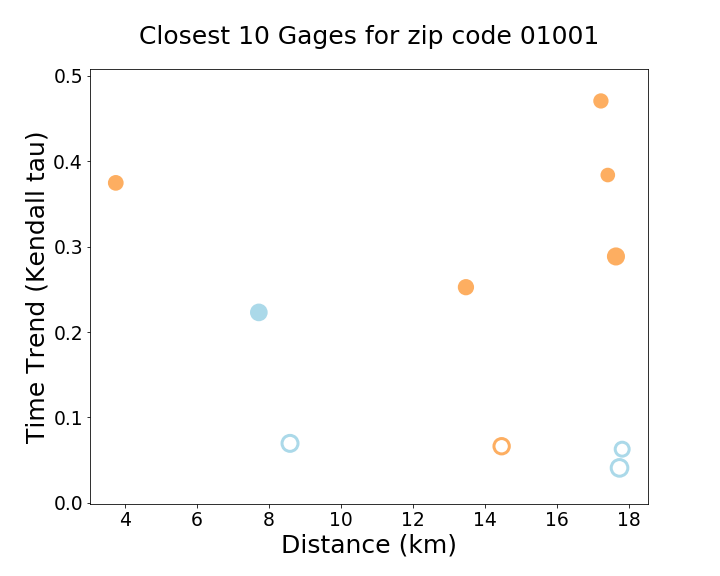

### Descriptive Housing, Claims, Return Periods

The descriptive statistics for a given zip code for the housing, flood insurance claims, and return period of the respective gages are provided in a series of three panel plots. 

_Houing value_ : covers the range of available housing data from Zillow for the zip code. Values have been converted to percentage change month-over-month. Results are presented as a line plot.

_Flood Insurance Claims_ : The total residential flood insurance claims (building and contents) for the zip code aggregated by month. This is presented as a bar chart. If there are no bars but the plot is included, it indicates that there were claims in the zip code before 1996.

_Flood Return Periods_ : A scatterplot of the return periods assigned to the floods associated with the gages representing the zip code. Higher values indicate larger floods. Sometimes not all 10 gages are plotted because the gage was not active for that period or due to other data processing issues. Each gage is a separate color.

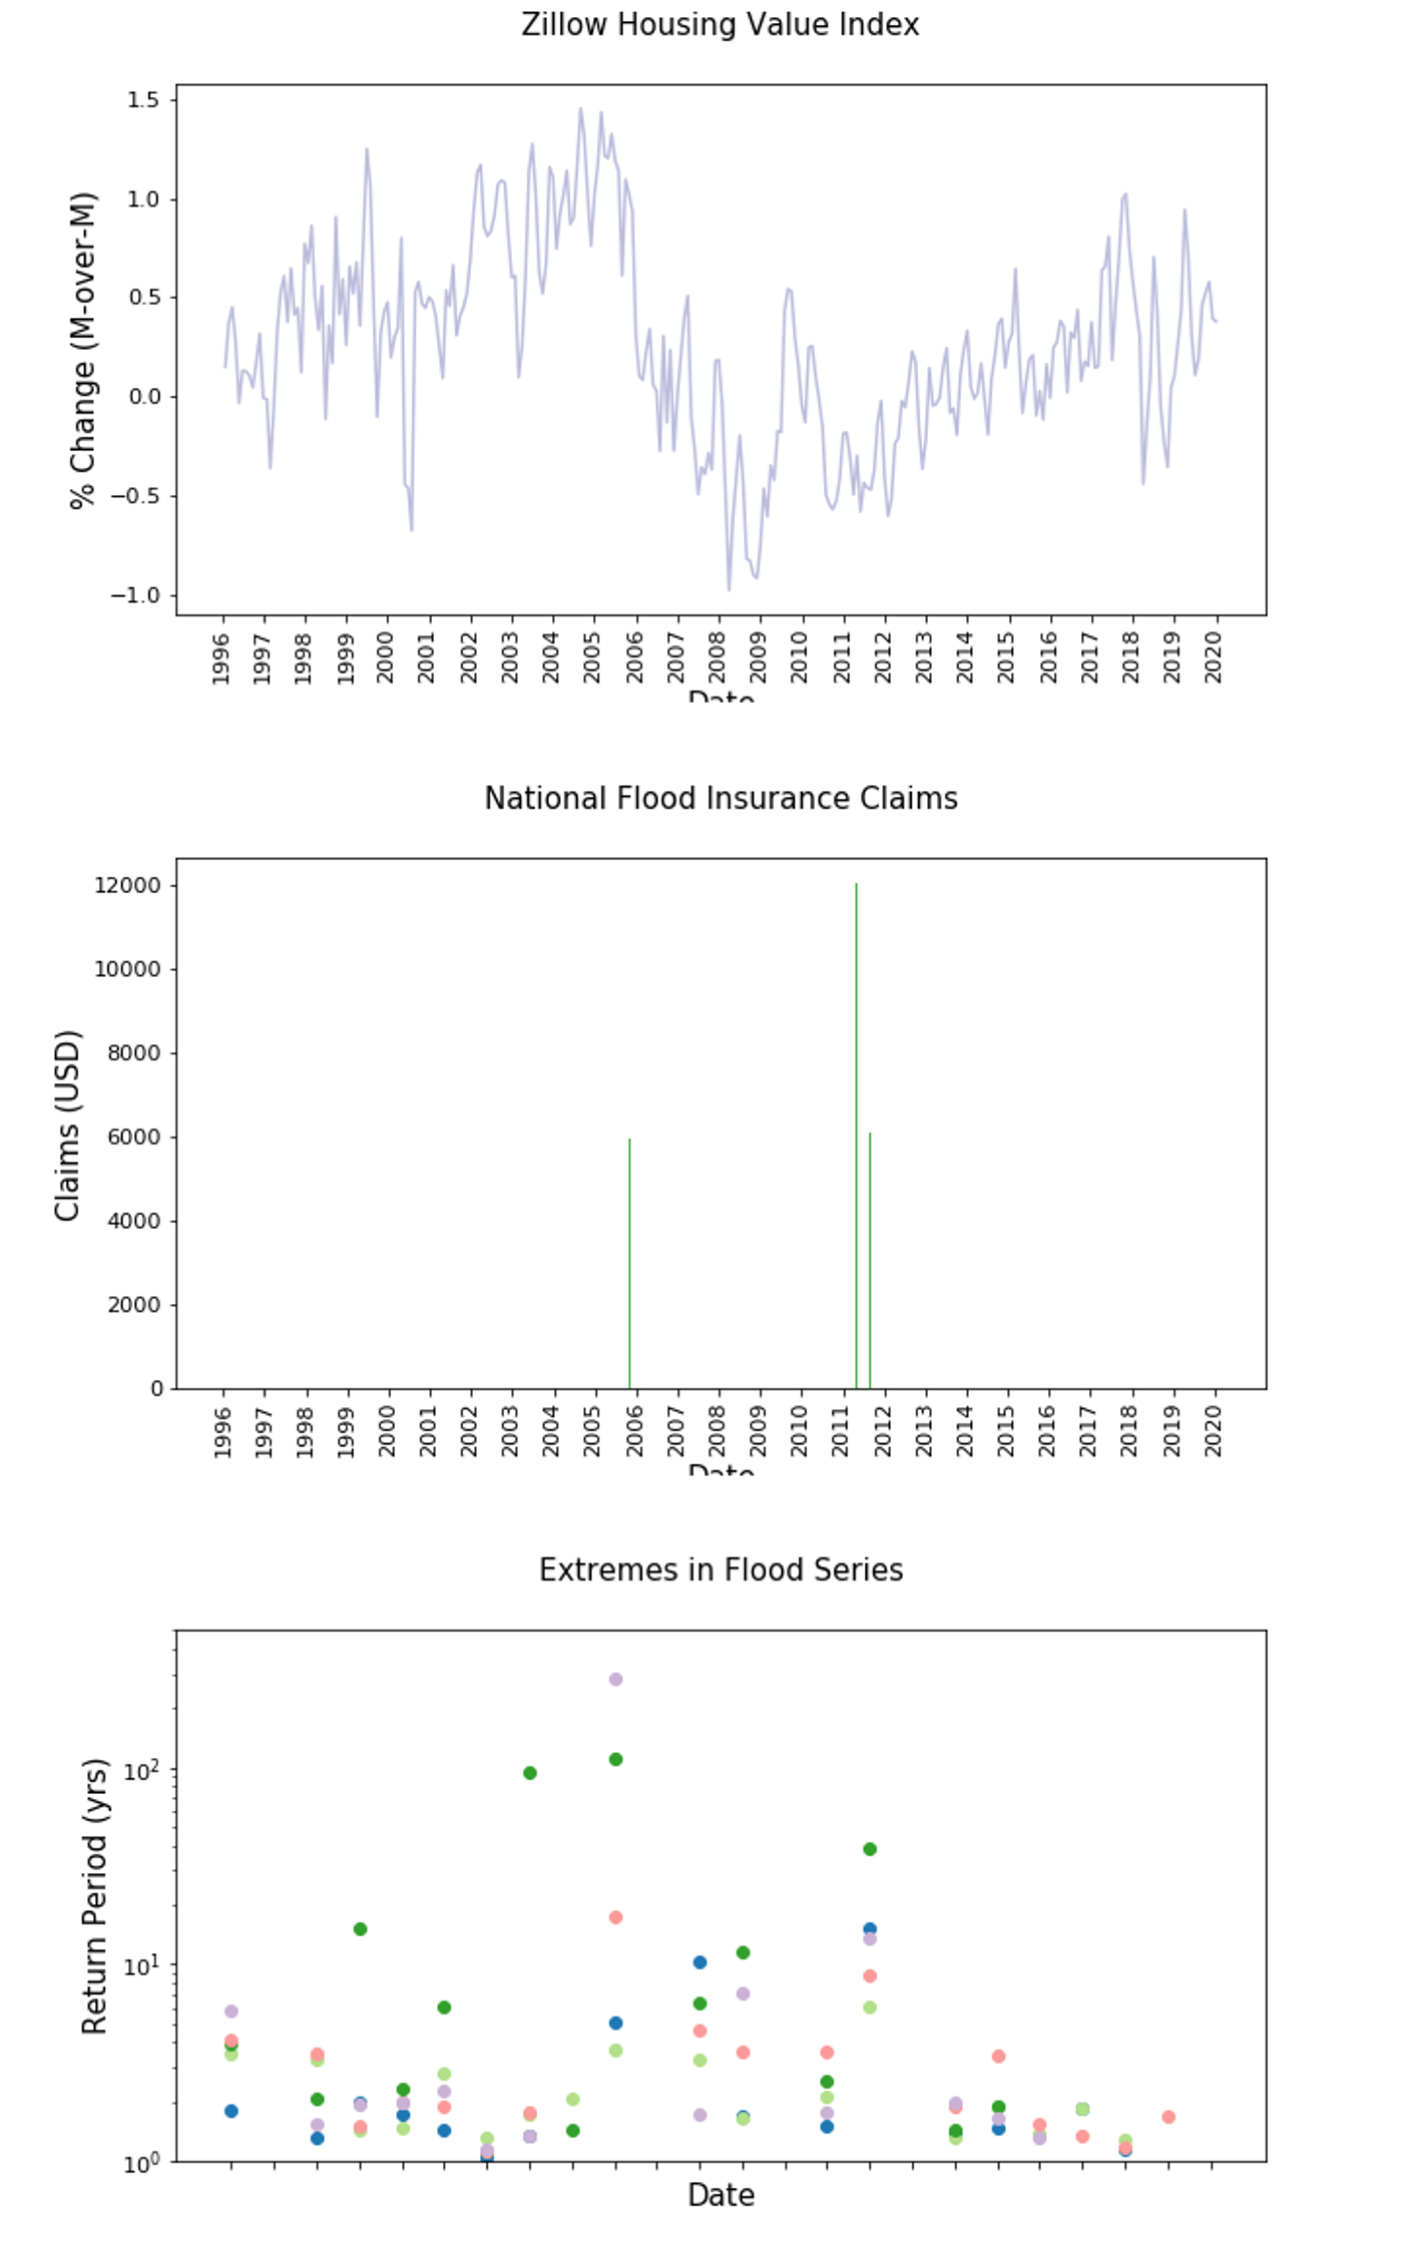

## Housing Market Predictions following 100-yr Flood